Ridge Regression

In [30]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
from sklearn.datasets import load_diabetes

data = load_diabetes()

In [4]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
x = data.data 
y = data.target 

In [13]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=45)

In [14]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()

In [15]:
lr.fit(X_train,y_train)

LinearRegression()

In [18]:
y_pred = lr.predict(X_test)

In [19]:
from sklearn.metrics import r2_score, mean_squared_error 

print('R2 score',r2_score(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.5188113124539249
RMSE 48.72713760953253


In [24]:
from sklearn.linear_model import Ridge
R = Ridge(alpha=0.0001)

In [25]:
R.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [26]:
y_pred1 = R.predict(X_test)

In [27]:
print('R2 score',r2_score(y_test,y_pred1))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score 0.5189732635884949
RMSE 48.71893700181956


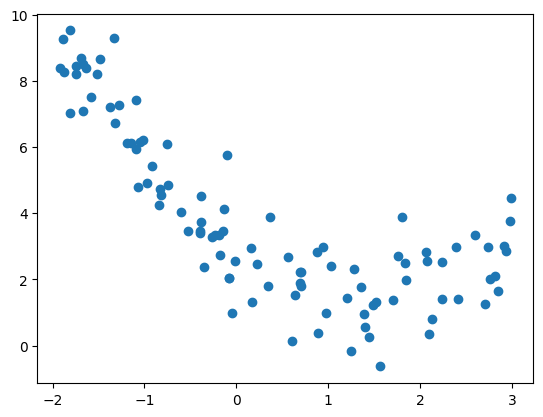

In [31]:
# Generate dataset -> non linear dataset 

m = 100
X1 = 5 * np.random.rand(m,1) -2 
X2 = 0.7 * X1 ** 2 -2 * X1 + 3 + np.random.randn(m,1)

plt.scatter(X1,X2)
plt.show()

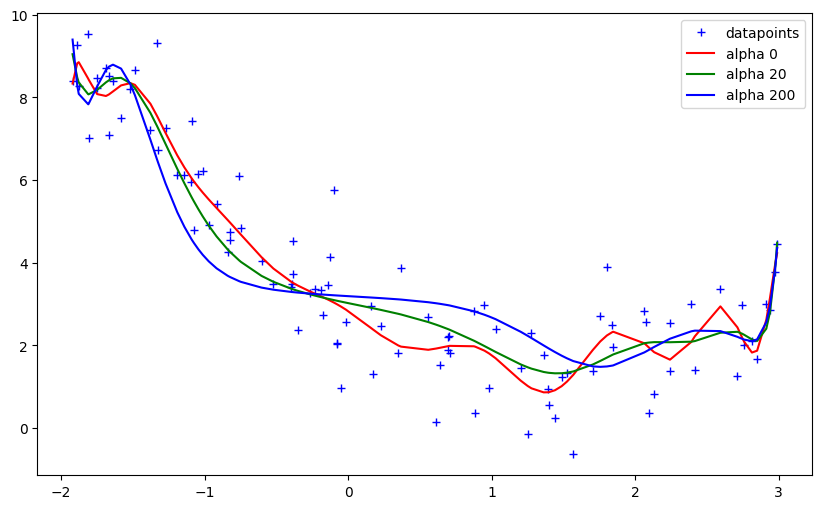

In [35]:
# polynomial 

from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(X1,X2,alpha):
  model = Pipeline([
      ('poly_feats', PolynomialFeatures(degree=16)),
      ('ridge',Ridge(alpha= alpha))
  ])
  model.fit(X1,X2)
  return model.predict(X1)

alphas = [0,20,200]  
cs = ['r','g','b']

plt.figure(figsize= (10,6))
plt.plot(X1,X2,'b+',label='datapoints')

for alpha, c in zip(alphas,cs):
  preds = get_preds_ridge(X1,X2,alpha)

  # plot 
  plt.plot(sorted(X1[:,0]),preds[np.argsort(X1[:,0])],c,label='alpha {}'.format(alpha))
plt.legend()
plt.show()
